In [2]:
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense ,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
from keras.models import load_model

In [4]:
train_path="dataset/train"
test_path="dataset/test"
valid_path="dataset/valid"

In [5]:
train_batches=ImageDataGenerator().flow_from_directory(train_path ,target_size=(224,224),classes=["anger","happy","nuetral","sad"],batch_size=6)

Found 120 images belonging to 4 classes.


In [6]:
test_batches=ImageDataGenerator().flow_from_directory(test_path ,target_size=(224,224),classes=["anger","happy","nuetral","sad"],batch_size=2)

Found 40 images belonging to 4 classes.


In [7]:
valid_batches=ImageDataGenerator().flow_from_directory(valid_path ,target_size=(224,224),classes=["anger","happy","nuetral","sad"],batch_size=2)

Found 40 images belonging to 4 classes.


In [8]:
train_batches.class_indices

{'anger': 0, 'happy': 1, 'nuetral': 2, 'sad': 3}

Building Model And Training

In [9]:
vgg16_model=keras.applications.vgg16.VGG16()

In [10]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
type(vgg16_model)

keras.engine.training.Model

In [12]:
model=Sequential()

In [13]:
type(model)

keras.engine.sequential.Sequential

adding all layer except last prediction layer to our model

In [14]:
for i in range(len(vgg16_model.layers)-1):
    model.add(vgg16_model.layers[i])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

Frezzing all layer of vgg net so that the weights do not get changed

In [16]:
for layer in model.layers:
    layer.trainable=False

In [17]:
model.add(Dense(400,activation="relu",name="fc3"))

In [18]:
model.add(Dense(400,activation="relu",name="fc4"))

In [19]:
model.add(Dense(4,activation="softmax",name="fc5"))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

training the model

In [21]:
model.compile(Adam(lr=.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
model.fit_generator(train_batches ,steps_per_epoch=12,validation_data=valid_batches,validation_steps=5,epochs=6,verbose=2)

Epoch 1/6
 - 194s - loss: 1.9780 - acc: 0.4306 - val_loss: 0.5200 - val_acc: 0.8000
Epoch 2/6
 - 189s - loss: 0.6577 - acc: 0.7361 - val_loss: 0.4756 - val_acc: 0.7750
Epoch 3/6
 - 191s - loss: 0.3930 - acc: 0.8333 - val_loss: 0.1612 - val_acc: 1.0000
Epoch 4/6
 - 190s - loss: 0.1710 - acc: 0.9444 - val_loss: 0.6193 - val_acc: 0.8750
Epoch 5/6
 - 153s - loss: 0.1231 - acc: 0.9583 - val_loss: 0.3400 - val_acc: 0.8000
Epoch 6/6
 - 118s - loss: 0.0386 - acc: 0.9861 - val_loss: 0.0727 - val_acc: 0.9750


predicting using our model

In [42]:
img=image.load_img("sad/4.jpg",target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [37]:
model.load_weights("model.h5")

In [43]:
images = np.vstack([x])
emotion = model.predict_classes(images, batch_size=10)

In [29]:
def emotion_teller(emotion):
    if emotion==0:
        print("You seem to be ANGRY !!")
    if emotion==1:
        print("You seem to be HAPPY !!")
    if emotion==2:
        print("You seem to be NUETRAL !!")
    if emotion==3:
        print("You seem to be SAD !!")

You seem to be HAPPY !!


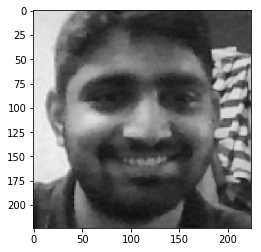

In [44]:
plt.imshow(img)
emotion_teller(emotion)